In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [ ]:

# Load the dataset
# file_path = 'https://github.com/iMnuelll/Bangkit_Capstone/raw/main/Data%20Dummy/concate_df.csv'
# file_path = 'https://github.com/iMnuelll/Bangkit_Capstone/raw/main/Preprocessing/data_gform_after_flatten.csv'
# file_path = './data_dummy_rev3.csv'
file_path = './new_dummy (1).csv'
df = pd.read_csv(file_path, delimiter='|')
# df = pd.read_csv(file_path, delimiter=',')

features = [
            # 'gender',
            'age',
            'job',
            # 'task',
            # 'difficulty',
            # 'average_rest',
            # 'mood_before_work',
            # 'mood_after_work',
            'deadline',
            # 'importance',
            'sleep_average',
            'urgency',
            'total_gangguan',
            # 'work_hour_label',
            'average_work_hour',
            'work_days',
            ]
# Define features and target
# X = df.drop(['productive_time', 'gender', 'mood_after_work'], axis=1)
X = df[features]
y = df['productive_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50,
                                                    stratify=y,
                                                    )

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(y_train.value_counts())
print(y_test.value_counts())

productive_time
1    66
2    66
3    65
0    65
Name: count, dtype: int64
productive_time
3    17
0    17
1    16
2    16
Name: count, dtype: int64


In [ ]:
# Build the regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)
                          ),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)
    ),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.1) #---
    ),
    tf.keras.layers.Dense(256, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)
    ),
    tf.keras.layers.Dense(64, activation='relu',
                          # kernel_regularizer=tf.keras.regularizers.l2(0.001)
    ),
    tf.keras.layers.Dense(32, activation='relu',
                          # kernel_regularizer=tf.keras.regularizers.l2(0.001)
    ),
    tf.keras.layers.Dense(4, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 16
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the validation set
evaluation = model.evaluate(X_test, y_test, verbose=0)
# print('Model evaluation:', evaluation)

# Print evaluation results
print(f"Test Loss: {evaluation[0]:.4f}")
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")


Epoch 1/200
15/15 [==============================] - 2s 26ms/step - loss: 33.1092 - accuracy: 0.3188 - val_loss: 24.7116 - val_accuracy: 0.3939
Epoch 2/200
15/15 [==============================] - 0s 10ms/step - loss: 19.6934 - accuracy: 0.3799 - val_loss: 14.3688 - val_accuracy: 0.4040
Epoch 3/200
15/15 [==============================] - 0s 10ms/step - loss: 11.3538 - accuracy: 0.4148 - val_loss: 8.2510 - val_accuracy: 0.4242
Epoch 4/200
15/15 [==============================] - 0s 10ms/step - loss: 6.5915 - accuracy: 0.4148 - val_loss: 4.8795 - val_accuracy: 0.4343
Epoch 5/200
15/15 [==============================] - 0s 10ms/step - loss: 3.9791 - accuracy: 0.4585 - val_loss: 3.0972 - val_accuracy: 0.4747
Epoch 6/200
15/15 [==============================] - 0s 10ms/step - loss: 2.7096 - accuracy: 0.4192 - val_loss: 2.2484 - val_accuracy: 0.5455
Epoch 7/200
15/15 [==============================] - 0s 9ms/step - loss: 2.0091 - accuracy: 0.4716 - val_loss: 1.7608 - val_accuracy: 0.5859
Ep

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

model = tf.keras.Sequential([
    Dense(128, input_shape=(X_train.shape[1],),
          # kernel_regularizer=tf.keras.regularizers.l2(0.001)
          ),
    # BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    # Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # # BatchNormalization(),
    # Activation('relu'),
    # Dropout(0.4),

    # Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # # BatchNormalization(),
    # Activation('relu'),
    # Dropout(0.2),

    Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(16,
          # kernel_regularizer=tf.keras.regularizers.l2(0.0001)
          ),
    # BatchNormalization(),
    Activation('relu'),
    # Dropout(0.3),

    # Dense(16),
    # # BatchNormalization(),
    # Activation('relu'),
    # # Dropout(0.2),

    # Dense(8),
    # # BatchNormalization(),
    # Activation('relu'),


    Dense(4, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0006)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 16
history = model.fit(X_train, y_train, epochs=300, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

# evaluation = model.evaluate(X_test, y_test, verbose=0)
# print(f"Test Loss: {evaluation[0]:.4f}")
# print(f"Test Accuracy: {evaluation[1]*100:.2f}%")


Epoch 1/300
17/17 [==============================] - 1s 16ms/step - loss: 2.7005 - accuracy: 0.2634 - val_loss: 2.6102 - val_accuracy: 0.2576
Epoch 2/300
17/17 [==============================] - 0s 5ms/step - loss: 2.5585 - accuracy: 0.2939 - val_loss: 2.5080 - val_accuracy: 0.3636
Epoch 3/300
17/17 [==============================] - 0s 6ms/step - loss: 2.4470 - accuracy: 0.3588 - val_loss: 2.4160 - val_accuracy: 0.4091
Epoch 4/300
17/17 [==============================] - 0s 4ms/step - loss: 2.3411 - accuracy: 0.3969 - val_loss: 2.3464 - val_accuracy: 0.5152
Epoch 5/300
17/17 [==============================] - 0s 5ms/step - loss: 2.2304 - accuracy: 0.4122 - val_loss: 2.2765 - val_accuracy: 0.5606
Epoch 6/300
17/17 [==============================] - 0s 5ms/step - loss: 2.1091 - accuracy: 0.4962 - val_loss: 2.2199 - val_accuracy: 0.5909
Epoch 7/300
17/17 [==============================] - 0s 4ms/step - loss: 2.0133 - accuracy: 0.4580 - val_loss: 2.1896 - val_accuracy: 0.6364
Epoch 8/300


In [ ]:
# Function to plot accuracy and loss
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

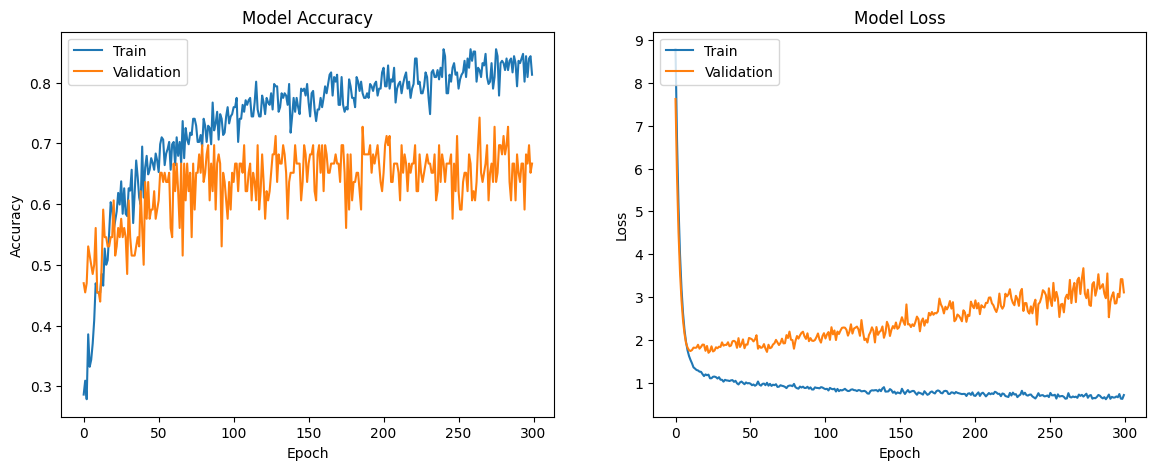

In [ ]:
# Plot the training history
plot_history(history)

In [ ]:
# Asumsikan 'model' adalah variabel yang berisi model TensorFlow yang telah dilatih Anda

# # Muat data
# data = pd.read_csv('path_to_your_data.csv')
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# # Split data untuk validasi
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# column_names = X_test.columns.tolist()

# Evaluasi baseline
baseline_preds = model.predict(X_test)
baseline_acc = accuracy_score(y_test, np.argmax(baseline_preds, axis=1))

# Inisialisasi dictionary untuk menyimpan importansi fitur
feature_importance = {}


# Permutasi fitur dan evaluasi pengaruhnya
for i in range(X_test.shape[1]):  # Iterate over columns
    X_val_permuted = X_test.copy()
    X_val_permuted[:, i] = np.random.permutation(X_val_permuted[:, i])  # Permutasi kolom

    permuted_preds = model.predict(X_val_permuted)
    permuted_acc = accuracy_score(y_test, np.argmax(permuted_preds, axis=1))

    # Perhitungan pengaruh fitur
    feature_importance[features[i]] = baseline_acc - permuted_acc # Simpan menggunakan indeks kolom

# Menampilkan hasil
feature_importance_sorted = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))
print(feature_importance_sorted)


3/3 [==============================] - 0s 3ms/step
{'deadline': 0.22727272727272724, 'sleep_average': 0.21212121212121204, 'age': 0.1515151515151515, 'average_work_hour': 0.13636363636363635, 'work_days': 0.09090909090909083, 'urgency': 0.06060606060606055}
